In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, log_loss, r2_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier
from GBDT.GradientBoostDecisionTree import GBDTClassifier

In [2]:
data = datasets.load_iris()
x = data.data
y = data.target
x.shape

(150, 4)

## My GBDT

In [3]:
Gbdt = GBDTClassifier(100, 0.1, 'deviance', tree_params={'criterion': 'mse', 'max_depth': 3}, subsample=0.5)
Gbdt.fit(x, y)

[-0.69314718 -0.69314718 -0.69314718]


GBDTClassifier(learning_rate=0.1, loss='deviance', n_estimators=100,
               random_state=None, subsample=0.5,
               tree_params={'criterion': 'mse', 'max_depth': 3})

In [4]:
r2_score(y, Gbdt.predict(x))

0.98

In [5]:
Gbdt.predict_log_proba(x)

array([[ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.20284198, -2.34557188],
       [ 2.05886275, -2.34548297, -2.34563086],
       [ 2.05886275, -2.26221532, -2.34563086],
       [ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.34158763, -2.34563086],
       [ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.17077557, -2.34557188],
       [ 2.05886275, -2.26257303, -2.34563086],
       [ 2.05886275, -2.34158763, -2.34563086],
       [ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.20244359, -2.34557188],
       [ 2.05886275, -2.28016312, -2.34557188],
       [ 2.05886275, -2.16340719, -2.34563086],
       [ 2.05886275, -2.17476952, -2.34563086],
       [ 2.05886275, -2.34158763, -2.34563086],
       [ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.17170108, -2.34563086],
       [ 2.05886275, -2.34163748, -2.34563086],
       [ 2.05886275, -2.34158763, -2.345

In [6]:
Gbdt.predict_proba(x)

array([[0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.09949557, 0.08741839],
       [0.88684009, 0.08742548, 0.08741368],
       [0.88684009, 0.09430099, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.08773676, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.10240572, 0.08741839],
       [0.88684009, 0.09427045, 0.08741368],
       [0.88684009, 0.08773676, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.09953127, 0.08741839],
       [0.88684009, 0.09277922, 0.08741839],
       [0.88684009, 0.103085  , 0.08741368],
       [0.88684009, 0.10203919, 0.08741368],
       [0.88684009, 0.08773676, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.10232068, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.88684009, 0.08773676, 0.08741368],
       [0.88684009, 0.08773277, 0.08741368],
       [0.

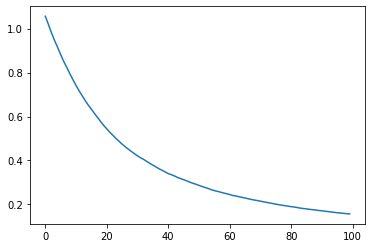

In [7]:
plt.plot(range(len(Gbdt.train_score_)), Gbdt.train_score_)

In [8]:
Gbdt.feature_importances_

array([0.0271624 , 0.03806199, 0.48944286, 0.44533275])

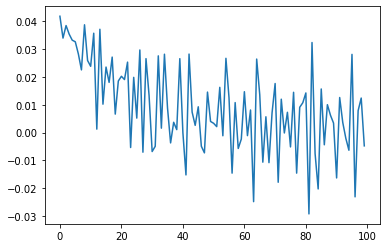

In [9]:
plt.plot(range(len(Gbdt.oob_improvement_)), Gbdt.oob_improvement_)

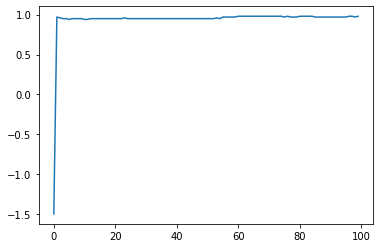

In [10]:
scores = [r2_score(y, pred) for pred in Gbdt.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [11]:
log_proba = [p for p in Gbdt.staged_predict_log_proba(x)]
log_proba[0].shape

(150, 3)

In [12]:
Gbdt.get_params()

{'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 100,
 'random_state': None,
 'subsample': 0.5,
 'tree_params': {'criterion': 'mse', 'max_depth': 3}}

In [13]:
from sklearn.utils.estimator_checks import check_estimator
#check_estimator(GBDTClassifier)

 ## Sklearn GBDT

In [23]:
gbr = GradientBoostingClassifier(criterion='mse', loss='deviance', n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.5)
gbr.fit(x, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
r2_score(y, gbr.predict(x))

1.0

In [16]:
gbr.predict_log_proba(x)

array([[-1.44142857e-04, -8.91558579e+00, -1.15277556e+01],
       [-1.80757985e-04, -8.66285793e+00, -1.17547226e+01],
       [-1.62688040e-04, -8.77202149e+00, -1.17788597e+01],
       [-1.59881584e-04, -8.79317577e+00, -1.17232054e+01],
       [-1.44142857e-04, -8.91558579e+00, -1.15277556e+01],
       [-1.44142857e-04, -8.91558579e+00, -1.15277556e+01],
       [-1.12966607e-04, -9.17975635e+00, -1.15275748e+01],
       [-1.44142857e-04, -8.91558579e+00, -1.15277556e+01],
       [-2.10807651e-04, -8.50919561e+00, -1.15985375e+01],
       [-1.59881584e-04, -8.79317577e+00, -1.17232054e+01],
       [-1.44142857e-04, -8.91558579e+00, -1.15277556e+01],
       [-1.12966607e-04, -9.17975635e+00, -1.15275748e+01],
       [-1.80757985e-04, -8.66285793e+00, -1.17547226e+01],
       [-1.80673053e-04, -8.66332786e+00, -1.17551926e+01],
       [-1.84070452e-04, -8.65509751e+00, -1.15313844e+01],
       [-1.84004956e-04, -8.65545336e+00, -1.15317402e+01],
       [-1.44142857e-04, -8.91558579e+00

In [17]:
gbr.predict_proba(x)

array([[9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99819258e-01, 1.72889494e-04, 7.85215430e-06],
       [9.99837325e-01, 1.55009912e-04, 7.66489551e-06],
       [9.99840131e-01, 1.51765231e-04, 8.10357329e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99887040e-01, 1.03105652e-04, 9.85457412e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99789215e-01, 2.01605930e-04, 9.17950265e-06],
       [9.99840131e-01, 1.51765231e-04, 8.10357329e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99887040e-01, 1.03105652e-04, 9.85457412e-06],
       [9.99819258e-01, 1.72889494e-04, 7.85215430e-06],
       [9.99819343e-01, 1.72808267e-04, 7.84846518e-06],
       [9.99815946e-01, 1.74236408e-04, 9.81710402e-06],
       [9.99816012e-01, 1.74174417e-04, 9.81361124e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99855868e-01, 1.34279

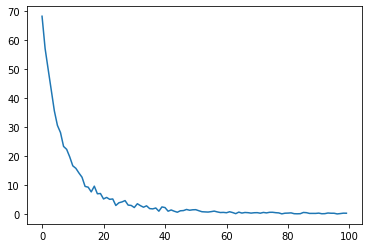

In [18]:
plt.plot(range(len(gbr.train_score_)), gbr.train_score_)

In [19]:
gbr.feature_importances_

array([0.02225373, 0.03287844, 0.55139463, 0.39347319])

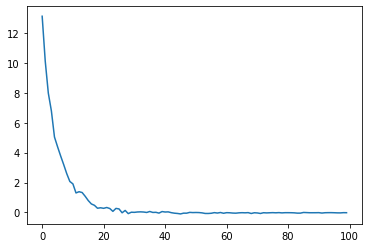

In [20]:
plt.plot(range(len(gbr.oob_improvement_)), gbr.oob_improvement_)

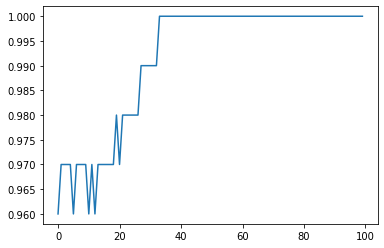

In [21]:
scores = [r2_score(y, pred) for pred in gbr.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [22]:
proba = [p for p in gbr.staged_predict_proba(x)]
proba[0].shape

(150, 3)